In [1]:
import torch
# from lavis.models import load_model_and_preprocess
import pandas as pd
import os
from PIL import Image
import logging
# import argparse
# from torch.utils.data import Dataset
# from tqdm import tqdm
# import torch.utils.data as data
import random
import json

In [51]:
val_feather_path = '../raw_data/val_completed_exist_with_llava_outputs.feather'
val_df = pd.read_feather(val_feather_path)  # already drop the non-exists
val_img_dir = '/import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids'

In [47]:
root_dir = '/import/network-temp/yimengg/NewsCLIPpings/processed_data'
data_dir = '/import/network-temp/yimengg/NewsCLIPpings/news_clippings/data/'
img_dir = '/import/network-temp/yimengg/NewsCLIPpings/visual_news/origin'
visual_news_data = json.load(open("/import/network-temp/yimengg/NewsCLIPpings/visual_news/origin/data.json"))
visual_news_data_mapping = {ann["id"]: ann for ann in visual_news_data}
merged_balanced_split = json.load(open("/import/network-temp/yimengg/NewsCLIPpings/news_clippings/data/merged_balanced/train.json"))


{'id': 1527079, 'image_id': 1653682, 'similarity_score': 0.7307947874069214, 'source_dataset': 2, 'falsified': True}
{'id': 1527079, 'caption': 'The bowl which dates from the time of the Roman conquest was described as an awkward object by Colchester Museums conservator', 'topic': 'arts_culture', 'source': 'bbc', 'image_path': './bbc/images/0241/251.jpg', 'article_path': './bbc/articles/1527079.txt'}
/import/network-temp/yimengg/NewsCLIPpings/visual_news/origin/bbc/images/0511/510.jpg
[Image]:


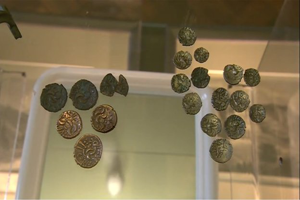

[Text]:
The bowl which dates from the time of the Roman conquest was described as an awkward object by Colchester Museums conservator

[Falsified]: True

[Image Path]: /import/network-temp/yimengg/NewsCLIPpings/visual_news/origin/bbc/images/0511/510.jpg

News agency: bbc


In [67]:
annotations = merged_balanced_split["annotations"]
item = annotations[21]
id = item["id"]
image_id = item["image_id"]
falsified = item["falsified"]
print(item)
text_item = visual_news_data_mapping[id]
print(text_item)
image_item = visual_news_data_mapping[image_id]
text = text_item["caption"]  # original caption

img_filename = image_item['image_path'][2:]
image_path = os.path.join(img_dir, img_filename)
print(image_path)

raw_image = Image.open(image_path).convert('RGB')
print(f"[Image]:")
display(raw_image.resize((300, 200)))
print(f"[Text]:\n{text}\n")
print(f"[Falsified]: {falsified}\n")
# print(f"[Llava Prediction]: {item['llava_output']}\n")
# print(f"[Llava Advanced Prompt Prediction]: {item['llava_advanced_prompt_output']}\n")
print(f"[Image Path]: {image_path}\n")
print(f"News agency: {text_item['source']}")

In [42]:
for ann in annotations:
    if ann["image_id"] == 272495:
        print(ann)

{'id': 198097, 'image_id': 272495, 'similarity_score': 0.6559035181999207, 'falsified': True}


In [9]:
non_equal_indices = val_df.index[val_df['falsified'] != val_df['llava_output']].tolist()
len(non_equal_indices)

8511

In [3]:
def display_news(val_df, idx):
    item = val_df.iloc[idx]
    text = item['full_text']  # original caption

    img_filename = item['filename']
    image_path = os.path.join(val_img_dir, img_filename)

    raw_image = Image.open(image_path).convert('RGB')
    print(f"[Image]:")
    display(raw_image.resize((300, 200)))
    print(f"[Text]:{text}")
    print(f"[Falsified]: {item['falsified']}")
    print(f"[Llava Prompt 1 Prediction]: {item['llava_output']}")
    # print(f"[Llava Advanced Prompt Prediction]: {item['llava_advanced_prompt_output']}\n")
    print(f"[Image Path]: {image_path}\n")

[10447, 20844, 8657, 7609, 13844, 480, 21822, 5405, 2653, 3695]
[Image]:


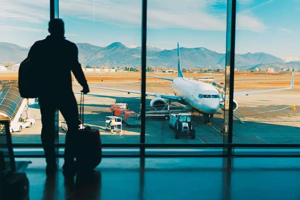

[Text]:US eases travel advisory for India after pandemic situation improves

https://t.co/A6d0yL1j7J

Download Economic Times App to stay updated with Business News -
 https://t.co/aqUreBZ6zm https://t.co/XZgDaAPXMT
[Falsified]: False
[Llava Prompt 1 Prediction]: True
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/61/1427505764160049152-1427505758246039561.jpg

[Image]:


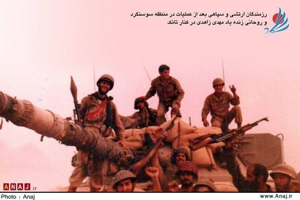

[Text]:A US M551 Sheridan besides its ammo &amp; other equipment, 1991 Gulf War.

The M551 had seen action in Vietnam &amp; Panama before Desert Storm, which was its last deployment. It never destroyed any enemy tanks, but provided decent fire support for light infantry units.

#TankTuesday https://t.co/g6Rm1CWnAn
[Falsified]: True
[Llava Prompt 1 Prediction]: False
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/13/1402145595419152386-1402145554604437513.jpg

[Image]:


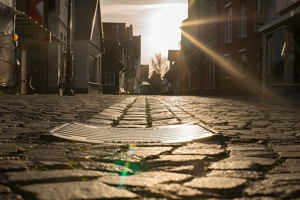

[Text]:COVID-19 is still very prevalent in our Illinois community; even in wastewater.

Backed by funding from Jump ARCHES, a composite sample project was launched that shows if there are high rates of virus detection in sewage water. Read more here: https://t.co/fdaK1N9vLj https://t.co/GtvrLcgUlg
[Falsified]: False
[Llava Prompt 1 Prediction]: True
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/81/1427284052588077058-1427284049224212481.jpg

[Image]:


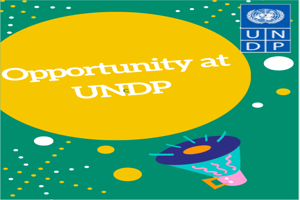

[Text]:ANNOUNCEMENT: Service providers are invited to submit requests for quotes for putting together the report The SOUTH AFRICA YOUTH BAROMETER KNOWLEDGE PRODUCT: PARIS AGREEMENT CLIMATE CHANGE. For more info click on the link below: https://t.co/GqETjKATk3 https://t.co/SvqTdphl8X
[Falsified]: False
[Llava Prompt 1 Prediction]: True
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/48/1411953980691861514-1411953897896398848.png

[Image]:


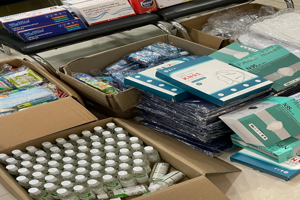

[Text]:Today keeping the ongoing efforts to help people affected by Covid. 3rd Consignment is going to Darjeeling for the Tea estate workers. There are still areas which need help and Covid Action group is sending help as needed.
#TeamSatishUpadhyay 
#CovidActionGroup https://t.co/CFSon02JTm
[Falsified]: False
[Llava Prompt 1 Prediction]: True
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/30/1427219878910464004-1427219841841123330.jpg

[Image]:


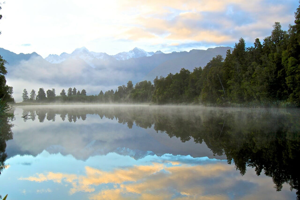

[Text]:University of Limerick Research Shows Long-term Benefits of Commercial Forests in Climate Change Fight – A new study involving researchers at University of Limerick has demonstrated the vital role th... https://t.co/oYzr8BbJlD https://t.co/VbSGZHmYE4
[Falsified]: False
[Llava Prompt 1 Prediction]: True
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/52/1407360078081052676-1407360076466331652.jpg

[Image]:


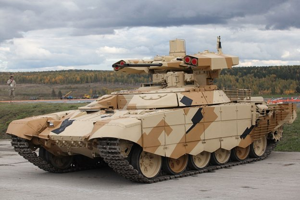

[Text]:The delivery of the bmpt-2  terminator to Algeria has already started few months ago. Waiting for the photos to be available soon

As reminder Algeria signed contract for 300 bmpt in 2016... https://t.co/UsXGgOY7vs
[Falsified]: False
[Llava Prompt 1 Prediction]: True
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/73/1275758564913623041-1275758536912515073.jpg

[Image]:


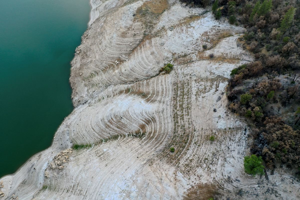

[Text]:"An aerial view shows low water levels at Lake Oroville, which is the second largest reservoir in California and according to daily reports of the state's Department of Water Resources is near 35% capacity" https://t.co/zZevGscS9q https://t.co/BEL1KCJVT8 https://t.co/L6yjmq9tjE
[Falsified]: False
[Llava Prompt 1 Prediction]: True
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/18/1413552209682370570-1413552032598921218.jpg

[Image]:


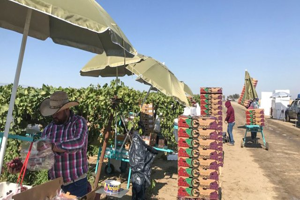

[Text]:Climate change and poverty wages are a deadly combination in the great capitalist USA. #ClimateCrisis
#Capitalism 
As high temperatures engulf the West Coast of the US, farmworkers must often choose betwee @AJEnglish https://t.co/HIQalZxPe5 https://t.co/vBn9RjhoTn
[Falsified]: False
[Llava Prompt 1 Prediction]: True
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/67/1415692257177612290-1415692254795214867.jpg

[Image]:


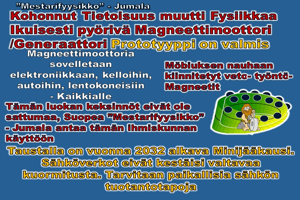

[Text]:@JoonasKiviranta Pariisi https://t.co/GCTeVVPFUx
Climate change is UN-led hoax to create 'New world order' Christiana Figueres: Democracy is a poor political system for fighting global warming. Communist China is best model.
Antarktis https://t.co/gUxHDt3hPi tekstitä
https://t.co/pLYRGhoMXR https://t.co/iGygOI18lD
[Falsified]: False
[Llava Prompt 1 Prediction]: True
[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/07/1425084589614194688-1425084582026747907.jpg



In [19]:
num_random_elements = 10
random_elements = random.sample(non_equal_indices, num_random_elements)
print(random_elements)
for idx in random_elements:
    display_news(val_df, idx)

In [3]:
toy_negative_feather_path = '../raw_data/toy_completed_exist_negative.feather'
toy_negative_df = pd.read_feather(toy_negative_feather_path)  # already drop the non-exists
toy_augmented_feather_path = '../raw_data/toy_completed_exist_augmented.feather'
toy_augmented_df = pd.read_feather(toy_augmented_feather_path)  # already drop the non-exists
toy_img_dir = '/import/network-temp/yimengg/data/twitter-comms/train/images/train_image_ids'

In [8]:
image_id_negative = toy_negative_df['image_id'].rename('image_id_negative')
filename_negative = toy_negative_df['filename'].rename('filename_negative')
falsified_negative = toy_negative_df['falsified'].rename('falsified_negative')
topic_negative = toy_negative_df['topic'].rename('topic_negative')
exists_negative = toy_negative_df['exists'].rename('exists_negative')

toy_triplet_df = pd.concat([toy_augmented_df, image_id_negative, filename_negative, falsified_negative, topic_negative, exists_negative], axis=1)


In [16]:
toy_triplet_df_dropna = toy_triplet_df.dropna()
toy_triplet_df_dropna = toy_triplet_df_dropna.reset_index()

In [27]:
toy_triplet_df_dropna.to_feather('../raw_data/toy_completed_exist_triplet.feather')

In [9]:
print(f"climate_random: {sum(val_df['topic'].apply(lambda topic: 'climate_random' in topic) & val_df['falsified'].apply(lambda falsified: falsified == True))}")
print(f"climate_hard: {sum(val_df['topic'].apply(lambda topic: 'climate_hard' in topic) & val_df['falsified'].apply(lambda falsified: falsified == True))}")

print(f"covid_random: {sum(val_df['topic'].apply(lambda topic: 'covid_random' in topic) & val_df['falsified'].apply(lambda falsified: falsified == True))}")
print(f"covid_hard: {sum(val_df['topic'].apply(lambda topic: 'covid_hard' in topic) & val_df['falsified'].apply(lambda falsified: falsified == True))}")

print(f"military_random: {sum(val_df['topic'].apply(lambda topic: 'military_random' in topic) & val_df['falsified'].apply(lambda falsified: falsified == True))}")
print(f"military_hard: {sum(val_df['topic'].apply(lambda topic: 'military_hard' in topic) & val_df['falsified'].apply(lambda falsified: falsified == True))}")

climate_random: 1140
climate_hard: 2669
covid_random: 2200
covid_hard: 8058
military_random: 501
military_hard: 1347


In [2]:
from lavis.models import model_zoo
print(model_zoo)

Architectures                  Types
albef_classification           ve
albef_feature_extractor        base
albef_nlvr                     nlvr
albef_pretrain                 base
albef_retrieval                coco, flickr
albef_vqa                      vqav2
alpro_qa                       msrvtt, msvd
alpro_retrieval                msrvtt, didemo
blip_caption                   base_coco, large_coco
blip_classification            base
blip_feature_extractor         base
blip_image_text_matching       base, large
blip_nlvr                      nlvr
blip_pretrain                  base
blip_retrieval                 coco, flickr
blip_vqa                       vqav2, okvqa, aokvqa
blip2_opt                      pretrain_opt2.7b, pretrain_opt6.7b, caption_coco_opt2.7b, caption_coco_opt6.7b
blip2_t5                       pretrain_flant5xl, pretrain_flant5xl_vitL, pretrain_flant5xxl, caption_coco_flant5xl
blip2_feature_extractor        pretrain, pretrain_vitL, coco
blip2                      

In [3]:
# Logger
logger = logging.getLogger()
logging.basicConfig(
    level=os.environ.get("LOGLEVEL", "INFO"),
    format="[%(asctime)s]:[%(processName)-11s]" + "[%(levelname)-s]:[%(name)s] %(message)s",
)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# blip2 captioning
model, vis_processors, _ = load_model_and_preprocess(name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device)

Position interpolate from 16x16 to 26x26


Loading checkpoint shards: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.72s/it]
[2023-11-07 06:47:58,943]:[MainProcess][INFO]:[timm.models.hub] Downloading: "https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP2/blip2_caption_flant5xl.pth" to /homes/yg007/.cache/torch/hub/checkpoints/blip2_caption_flant5xl.pth

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.07G/4.07G [02:23<00:00, 30.5MB/s]
[2023-11-07 06:50:28,517]:[MainProcess][INFO]:[root] Missing keys ['t5_model.shared.weight', 't5_model.encoder.embed_tokens.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.q.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.k.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.v.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.o.weight', 't5_model.encoder.block.0.layer.0.SelfAttention.relative_

[2023-11-07 06:50:28,518]:[MainProcess][INFO]:[root] load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP2/blip2_caption_flant5xl.pth


In [4]:
# blip captioning
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="base_coco", is_eval=True, device=device)

[2023-11-06 08:03:18,641]:[MainProcess][INFO]:[root] Missing keys []
[2023-11-06 08:03:18,645]:[MainProcess][INFO]:[root] load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP/blip_coco_caption_base.pth


In [4]:
item = val_df.iloc[16010]
text = item['full_text']  # original caption

img_filename = item['filename']
image_path = os.path.join(val_img_dir, img_filename)

raw_image = Image.open(image_path).convert('RGB')
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
# generate caption
generated_text = model.generate({"image": image, "prompt": "Question: Could you describe the image in detail? Answer:"}, repetition_penalty=5.0, length_penalty=2.0)
# ['a large fountain spewing water into the air']
print(f"Generated caption:\n{generated_text}")
print(f"Original text:\n{text}")
print("Input image:")
display(raw_image.resize((300, 200)))
print(f"Falsified: {item['falsified']}")

NameError: name 'vis_processors' is not defined

[Image]:


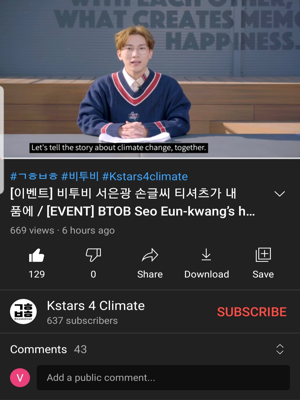

[Text]:
As #COP26 approaches, how does the UK plan to tackle climate change?

According to scientists, the UK is already undergoing disruptive climate change with increased rainfall, sunshine and temperatures. What now? https://t.co/vaA2AjOTZA

WATCH: https://t.co/iLAQy4utvD

#Newsnight https://t.co/8Wgt9JmytG

[Falsified]: True

[Image Path]: /import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids/56/1407935225389146117-1407935221974982656.jpg



In [66]:
item = val_df.iloc[8]
text = item['full_text']  # original caption

img_filename = item['filename']
image_path = os.path.join(val_img_dir, img_filename)

raw_image = Image.open(image_path).convert('RGB')
print(f"[Image]:")
display(raw_image.resize((300, 400)))
print(f"[Text]:\n{text}\n")
print(f"[Falsified]: {item['falsified']}\n")
# print(f"[Llava Prediction]: {item['llava_output']}\n")
# print(f"[Llava Advanced Prompt Prediction]: {item['llava_advanced_prompt_output']}\n")
print(f"[Image Path]: {image_path}\n")

In [3]:
val_feather_path = '../raw_data/val_completed_exist_with_llava_outputs.feather'
val_df = pd.read_feather(val_feather_path)  # already drop the non-exists
val_img_dir = '/import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids'

In [23]:
val_df.iloc[12][['full_text', 'falsified', 'llava_output', 'llava_advanced_prompt_output']]

full_text                       White House: Climate among "root causes" of mi...
falsified                                                                   False
llava_output                                                                 True
llava_advanced_prompt_output                                                False
Name: 12, dtype: object

In [15]:
labels = val_df['falsified'].tolist()

In [16]:
preds = val_df['llava_advanced_prompt_output'].tolist()

In [17]:
correct = 0
for i in range(22082):
    if labels[i] == preds[i]:
        correct += 1

print(correct)

11665


# NewCLIPpings

In [3]:
import json

In [10]:
visual_news_data = json.load(open("/import/network-temp/yimengg/NewsCLIPpings/visual_news/origin/data.json"))
visual_news_data_mapping = {ann["id"]: ann for ann in visual_news_data}

In [123]:
split = "scene_resnet_place"
test_img_dir = '/import/network-temp/yimengg/NewsCLIPpings/visual_news/origin'
test_data_path = f"/import/network-temp/yimengg/NewsCLIPpings/news_clippings/data/{split}/test.json"

In [124]:
test_data = json.load(open(test_data_path))

In [125]:
annotations = test_data["annotations"]

In [145]:
indices = []
for idx in range(len(annotations)):
    ann = annotations[idx]
    image_path = visual_news_data_mapping[ann["image_id"]]["image_path"]
    news_source = image_path.split('/')[1]
    if news_source == "bbc":
        indices.append(idx)

print(indices)

[2, 5, 10, 11, 23, 27, 38, 42, 43, 46, 47, 53, 54, 68, 70, 84, 85, 86, 87, 97, 102, 117, 118, 119, 123, 126, 132, 133, 137, 140, 147, 148, 156, 158, 159, 160, 162, 163, 165, 170, 174, 182, 183, 184, 185, 192, 196, 197, 199, 202, 207, 226, 232, 234, 237, 250, 260, 264, 267, 269, 275, 277, 281, 282, 283, 292, 293, 294, 298, 301, 305, 307, 313, 316, 322, 330, 331, 334, 340, 346, 347, 350, 354, 355, 358, 364, 368, 369, 377, 383, 386, 387, 393, 394, 395, 402, 404, 405, 412, 414, 416, 420, 422, 423, 426, 434, 436, 440, 442, 446, 451, 452, 454, 459, 466, 475, 476, 478, 481, 483, 484, 486, 494, 495, 500, 502, 506, 508, 509, 512, 523, 525, 528, 529, 538, 540, 542, 544, 548, 560, 572, 590, 606, 610, 611, 622, 628, 629, 630, 631, 632, 635, 638, 651, 658, 661, 664, 668, 670, 675, 692, 693, 700, 701, 704, 709, 712, 716, 730, 731, 732, 736, 738, 745, 748, 749, 759, 761, 764, 765, 766, 767, 768, 772, 776, 778, 782, 783, 788, 789, 795, 797, 802, 826, 827, 835, 840, 845, 851, 856, 858, 859, 882, 897, 9

In [157]:
idx = 159

caption: An elderly resident uses a rickety bamboo bridge over floodwaters to reach a house at Nyaung Don township in Irrawaddy
image:


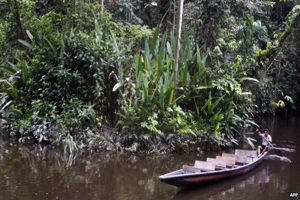

news agency: bbc
falsified: True


In [158]:
ann = annotations[idx]
caption = visual_news_data_mapping[ann["id"]]["caption"]  # original caption
image_path = visual_news_data_mapping[ann["image_id"]]["image_path"]
news_source = image_path.split('/')[1]
falsified = ann["falsified"]
print(f"caption: {caption}")
print(f"image:")
raw_image = Image.open(test_img_dir + image_path[1:]).convert('RGB')
display(raw_image.resize((300, 200)))
print(f"news agency: {news_source}")
print(f"falsified: {falsified}")
